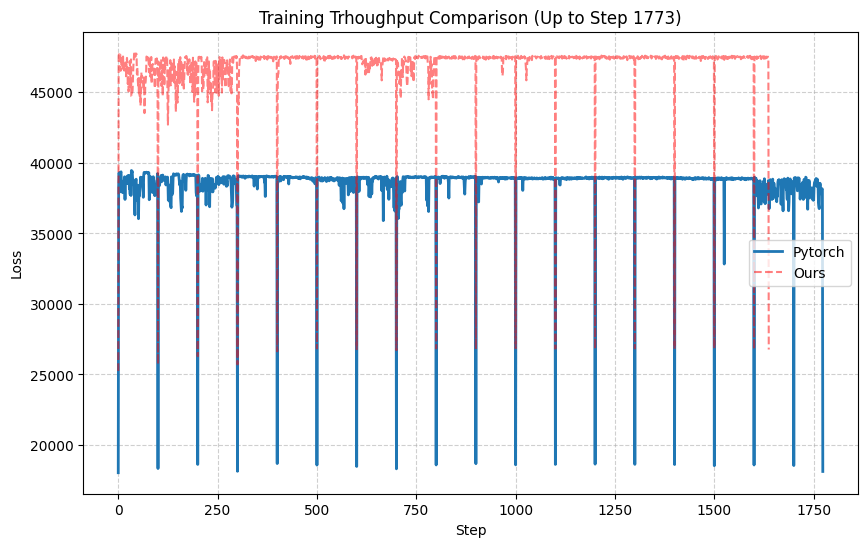

Avg. Throughput Pytorch: 38536.189605411506
Min Train Loss Pytorch: 5.930923
Min Val Loss Pytorch: 6.2567
Avg. Time Pytorch: 1711.2482356257046

Avg. Throughput ours: 47001.55144662698
Min Train Loss ours: 6.139346
Min Val Loss ours: 6.523564
Avg. Time ours: 1399.7660452264954
Avg. Data Time ours: 0.30258803418803415
Avg. Forward Time ours: 387.55176482112336
Avg. Loss Time ours: 40.24709984004884
Avg. Backward Time ours: 907.3955748369963
Avg. clip_grad Time ours: 37.232308153846155
Avg. Optimizer Time ours: 14.99206396092796
Avg. Tok_Emb Time ours: 4.071269137973138
Avg. Pos_Emb Time ours: 0.18156252991452992
Avg. Mlp Time ours: 138.0742301251526
Avg. Ln_f Time ours: 1.4861168449328448
Avg. LM Head Time ours: 252.35582037362636


In [20]:
#after madhu's kernel inlcusion
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
df_old = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log14.csv')
df_new = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_PyTorch_log9.csv')

if not df_old.empty:
    df_old.columns = df_old.columns.str.strip()
    df_new.columns = df_new.columns.str.strip()

# 1. Get the current progress (max step of the new run)
current_max_step = df_new['step'].max()

# 2. Filter the old run to match the current progress
df_old_truncated = df_old[df_old['step'] <= current_max_step]

# 3. Plotting
plt.figure(figsize=(10, 6))

plt.plot(df_new['step'], df_new['tok_per_sec'], label='Pytorch', linewidth=2)
plt.plot(df_old_truncated['step'], df_old_truncated['tok_per_sec'], label='Ours', linestyle = "--", color = "red", alpha=0.5)

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title(f'Training Trhoughput Comparison (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()


print("Avg. Throughput Pytorch:",df_new['tok_per_sec'].mean())
print("Min Train Loss Pytorch:",df_new['loss'][:].min())
print("Min Val Loss Pytorch:",df_new['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time Pytorch:",df_new['dt_ms'].mean())
# print("Avg. Data Time new:",df_new['timer_data'][:].mean())
# print("Avg. Forward Time new:",df_new['timer_fwd'][:].mean())
# print("Avg. Loss Time new:",df_new['timer_loss'][:].mean())
# print("Avg. Backward Time new:",df_new['timer_bwd'][:].mean())
# print("Avg. clip_grad Time new:",df_new['timer_clip'][:].mean())
# print("Avg. Optimizer Time new:",df_new['timer_optim'][:].mean())
# print("Avg. Tok_Emb Time new:",df_new['timer_tok_emb'][:].mean())
# print("Avg. Pos_Emb Time new:",df_new['timer_pos_emb'].mean())
# print("Avg. Mlp Time new:",df_new['timer_mlp'][:].mean())
# print("Avg. Ln_f Time new:",df_new['timer_ln_f'][:].mean())
# print("Avg. LM Head Time new:",df_new['timer_lm_head'][:].mean())


print("\nAvg. Throughput ours:",df_old['tok_per_sec'].mean())
print("Min Train Loss ours:",df_old['loss'][:].min())
print("Min Val Loss ours:",df_old['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time ours:",df_old['dt_ms'].mean())
print("Avg. Data Time ours:",df_old['timer_data'][:].mean())
print("Avg. Forward Time ours:",df_old['timer_fwd'][:].mean())
print("Avg. Loss Time ours:",df_old['timer_loss'][:].mean())
print("Avg. Backward Time ours:",df_old['timer_bwd'][:].mean())
print("Avg. clip_grad Time ours:",df_old['timer_clip'][:].mean())
print("Avg. Optimizer Time ours:",df_old['timer_optim'][:].mean())
print("Avg. Tok_Emb Time ours:",df_old['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time ours:",df_old['timer_pos_emb'].mean())
print("Avg. Mlp Time ours:",df_old['timer_mlp'][:].mean())
print("Avg. Ln_f Time ours:",df_old['timer_ln_f'][:].mean())
print("Avg. LM Head Time ours:",df_old['timer_lm_head'][:].mean())

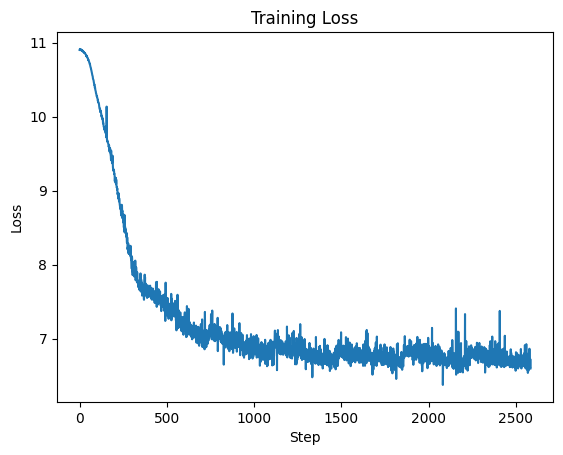

In [330]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/CPP_Training__log10.csv')

plt.plot(df['step'].to_numpy(), df['loss'].to_numpy())

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.savefig('loss_curve.png')

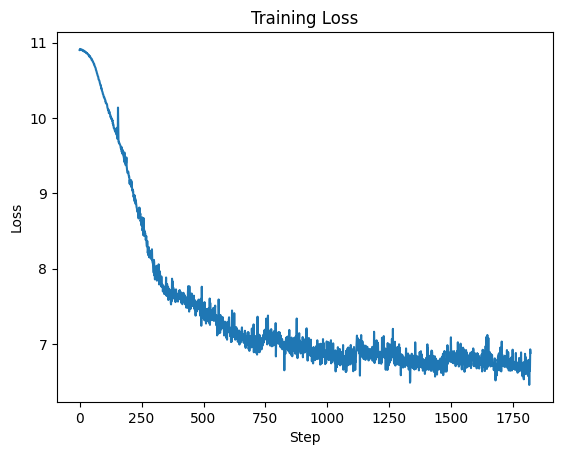

In [329]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/CPP_Training__log12.csv')

plt.plot(df['step'].to_numpy(), df['loss'].to_numpy())

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.savefig('loss_curve.png')